<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# DSI-SG-42 Project 3: Web APIs & NLP
### Reddit Scams: Are We Vulnerable?
---

## 4. Pre-Processing


### Importing Libraries

In [1]:
# pip install wordcloud
# pip install matplotlib-venn

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from matplotlib_venn import venn2, venn2_circles

from sklearn.feature_extraction.text import CountVectorizer

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter

from PIL import Image, ImageDraw

In [3]:
# Set display settings
pd.set_option('display.width', 10000)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
# Import CSV as a DataFrame
df = pd.read_csv('../data/cleaned_data.csv', lineterminator='\n')

In [5]:
# Split entire dataframe into 'RandomKindness' and 'Scams'
rk = df[df['label'] == 0]
sc = df[df['label'] == 1]

### 4.1 N-gram Analysis (Uni, Bi, Tri)
---

In [6]:
# Instantiate a CountVectorizer with the default hyperparameters, for unigrams & bigrams
cvec = CountVectorizer()
cvec2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
cvec3 = CountVectorizer(analyzer='word', ngram_range=(3, 3))

#### 4.1.1 Creating Functions for the N-grams

In [7]:
# Unigrams - Create a function to identify top 20 unigrams
def top_unigram(df,column):
    # Fit & Transform the data with the vectorizer, cvec
    vector = cvec.fit_transform(df[column])
    # Get unigram words by referencing the columns and storing in a new dataframe
    vector_df = pd.DataFrame(vector.toarray(),columns=[cvec.get_feature_names_out()])
    # Get frequency of occurence of each unigram
    vector_freq = vector_df.sum(axis=0)
    # Store the frequency and the corresponding unigram in the same dataframe
    vector_freq = pd.DataFrame({'unigram':cvec.get_feature_names_out(),'freq':vector_freq})
    # Get top 20 most occurring unigram
    top20 = vector_freq.sort_values(by='freq',ascending=False)[0:20]
    return top20.reset_index(drop=True)

In [8]:
# Bigrams - Create a function to identify top 20 bigrams
def top_bigram(df,column):
    # Fit & Transform the data with the vectorizer, cvec2
    vector = cvec2.fit_transform(df[column])
    # Get bigram words by referencing the columns and storing in a new dataframe
    vector_df = pd.DataFrame(vector.toarray(),columns=[cvec2.get_feature_names_out()])
    # Get frequency of occurence of each bigram
    vector_freq = vector_df.sum(axis=0)
    # Store the frequency and the corresponding bigram in the same dataframe
    vector_freq = pd.DataFrame({'bigram':cvec2.get_feature_names_out(),'freq':vector_freq})
    # Get top 20 most occurring bigram
    top20 = vector_freq.sort_values(by='freq',ascending=False)[0:20]
    return top20.reset_index(drop=True)

In [9]:
# Trigrams - Create a function to identify top 20 trigrams
def top_trigram(df,column):
    # Fit & Transform the data with the vectorizer, cvec3
    vector = cvec3.fit_transform(df[column])
    # Get trigram words by referencing the columns and storing in a new dataframe
    vector_df = pd.DataFrame(vector.toarray(),columns=[cvec3.get_feature_names_out()])
    # Get frequency of occurence of each trigram
    vector_freq = vector_df.sum(axis=0)
    # Store the frequency and the corresponding trigram in the same dataframe
    vector_freq = pd.DataFrame({'trigram':cvec3.get_feature_names_out(),'freq':vector_freq})
    # Get top 20 most occurring trigram
    top20 = vector_freq.sort_values(by='freq',ascending=False)[0:20]
    return top20.reset_index(drop=True)

#### 4.1.2 Analysing the N-grams

In [10]:
# RandomKindness n-gram
rk_top_unigram_df = top_unigram(rk, 'cleaned_text')
rk_top_bigram_df = top_bigram(rk, 'cleaned_text')
rk_top_trigram_df = top_trigram(rk, 'cleaned_text')
rk_n_gram_df = pd.concat([rk_top_unigram_df, rk_top_bigram_df, rk_top_trigram_df], axis=1)

In [11]:
# Display output
print(rk_n_gram_df)

   unigram   freq      bigram  freq          trigram  freq
0       to  13591   thank you  2424    thank you for   616
1      you  10820      if you  1104     thank you so   561
2      and  10478      in the   956      you so much   524
3      the   9853     love to   943    would love to   453
4      for   6096  would love   932       id love to   399
5       of   5874     so much   835  me your address   255
6       my   5438     this is   835      let me know   245
7       it   4937     for the   786     love to send   219
8       in   4405       to be   733      so much for   188
9       is   4204     you for   688       be able to   172
10      so   4073     you are   651      if you have   169
11    this   3944      of the   640    would like to   149
12    that   3736     id love   635      to send you   143
13    have   3735    would be   628   just wanted to   143
14      me   3582      you so   580       pm me your   141
15    your   3318     want to   571       this is so   1

In [12]:
# Scams n-gram
sc_top_unigram_df = top_unigram(sc, 'cleaned_text')
sc_top_bigram_df = top_bigram(sc, 'cleaned_text')
sc_top_trigram_df = top_trigram(sc, 'cleaned_text')
sc_n_gram_df = pd.concat([sc_top_unigram_df, sc_top_bigram_df, sc_top_trigram_df], axis=1)

In [13]:
# Display output
print(sc_n_gram_df)

   unigram   freq    bigram  freq           trigram  freq
0      the  19510    in the  1178       there is no   168
1       to  17646    of the  1147       you need to   163
2      and  13472    if you  1075        be able to   147
3      you  11015     to be  1059       this is the   121
4       it   7755   this is  1018  block and ignore   117
5       is   7466    on the   889      this is scam   115
6       of   7411    to the   883      is this scam   115
7     that   6673    it was   801       you have to   112
8     they   6483    to get   734     thank you for   112
9      for   5895  they are   687       and move on    99
10      in   5752   you can   634        good to be    96
11    this   5745   for the   613        to be true    96
12      on   4407     it is   582       it was scam    94
13    your   4144  going to   554      on the phone    92
14      if   4114   and the   535       too good to    92
15      my   3923  the same   520        if this is    88
16     not   3

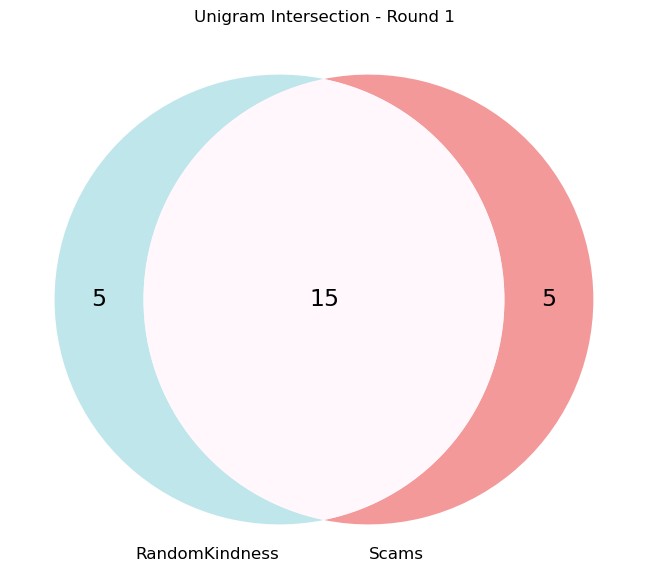

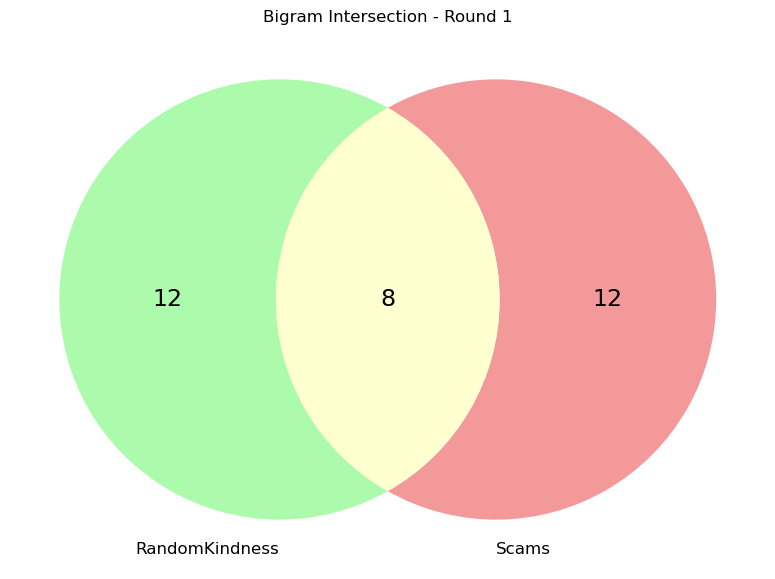

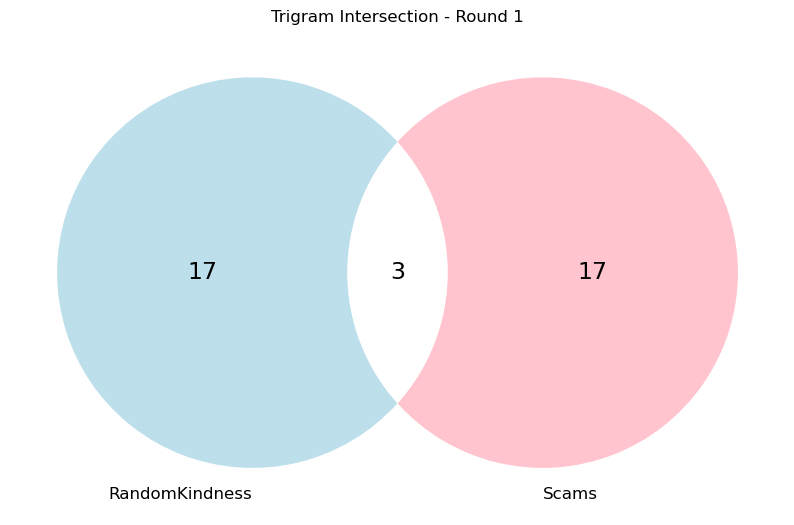

Common Words in Unigrams between RandomKindness and Scams:
your
this
that
the
have
if
you
of
for
it
and
in
my
to
is
Common Words in Bigrams between RandomKindness and Scams:
if you
you are
to be
of the
in the
this is
for the
to get
Common Words in Trigrams between RandomKindness and Scams:
if you have
thank you for
be able to


In [14]:
# Venn Diagram visualisation to show intersected words (round 1)
rk_unigrams = set(rk_top_unigram_df['unigram'])
sc_unigrams = set(sc_top_unigram_df['unigram'])

rk_bigrams = set(rk_top_bigram_df['bigram'])
sc_bigrams = set(sc_top_bigram_df['bigram'])

rk_trigrams = set(rk_top_trigram_df['trigram'])
sc_trigrams = set(sc_top_trigram_df['trigram'])

# Plot the Venn diagram with custom colors (Unigram)
plt.figure(figsize=(10, 7))
venn = venn2([rk_unigrams, sc_unigrams], ('RandomKindness', 'Scams'), 
             set_colors=('powderblue', 'lightcoral'), alpha = 0.8)

# Change the font size for the subset numbers
for text in venn.subset_labels:
    if text:  # check if the subset label is not None
        text.set_fontsize(17)

plt.title('Unigram Intersection - Round 1')
plt.show()

# Plot the Venn diagram with custom colors (Bigram)
plt.figure(figsize=(10, 7))
venn = venn2([rk_bigrams, sc_bigrams], ('RandomKindness', 'Scams'), 
             set_colors=('palegreen', 'lightcoral'), alpha = 0.8)

# Change the font size for the subset numbers
for text in venn.subset_labels:
    if text:  # check if the subset label is not None
        text.set_fontsize(17)

plt.title('Bigram Intersection - Round 1')
plt.show()

# Plot the Venn diagram with custom colors (Trigram)
plt.figure(figsize=(10, 7))
venn = venn2([rk_trigrams, sc_trigrams], ('RandomKindness', 'Scams'), 
             set_colors=('lightblue', 'lightpink'), alpha = 0.8)

# Change the font size for the subset numbers
for text in venn.subset_labels:
    if text:  # check if the subset label is not None
        text.set_fontsize(17)

plt.title('Trigram Intersection - Round 1')
plt.show()

# Find the intersection (common bigrams) between the two sets
common_unigrams = rk_unigrams.intersection(sc_unigrams)
print("Common Words in Unigrams between RandomKindness and Scams:")
for unigram in common_unigrams:
    print(unigram)

# Find the intersection (common bigrams) between the two sets
common_bigrams = rk_bigrams.intersection(sc_bigrams)
print("Common Words in Bigrams between RandomKindness and Scams:")
for bigram in common_bigrams:
    print(bigram)

# Find the intersection (common trigrams) between the two sets
common_trigrams = rk_trigrams.intersection(sc_trigrams)
print("Common Words in Trigrams between RandomKindness and Scams:")
for trigram in common_trigrams:
    print(trigram)

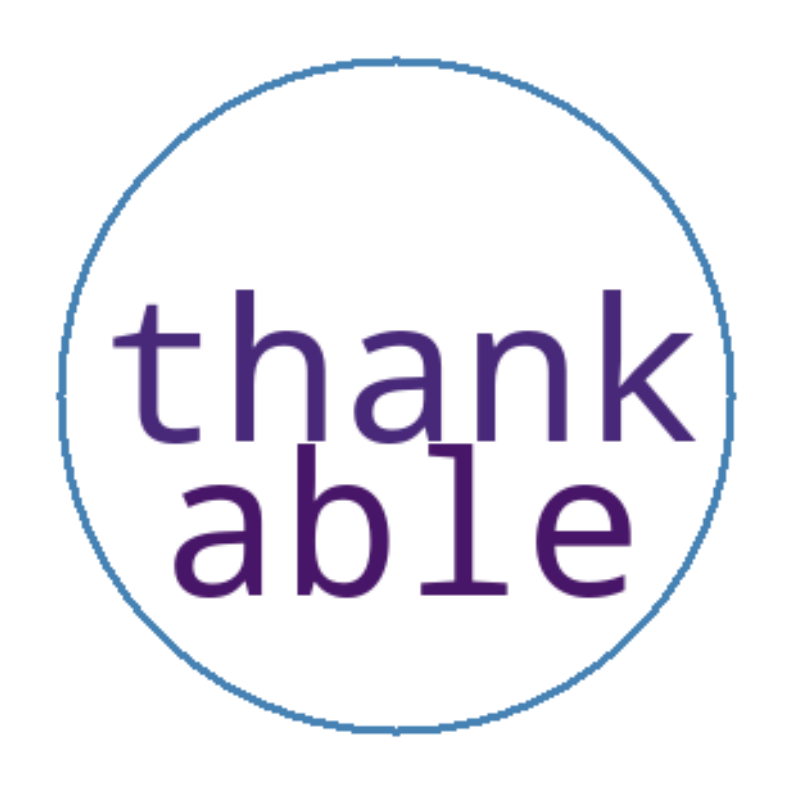

In [15]:
# For the purpose of this example, the intersection of bigrams and trigrams are treated as outliers, for visualization.

# Find the intersection (common bigrams and trigrams) between the two sets
common_unigrams = rk_unigrams.intersection(sc_unigrams)
common_bigrams = rk_bigrams.intersection(sc_bigrams)
common_trigrams = rk_trigrams.intersection(sc_trigrams)

# Combine the outlier words into one list for word cloud generation
# For bigrams and trigrams, join the words with '_' to keep them as single entities in the word cloud
outlier_words = list(common_unigrams) + list(common_bigrams) + list(common_trigrams)

# Function to generate a circular masked word cloud
def generate_circular_word_cloud(word_list):
    text = ' '.join(word_list)
    x, y = np.ogrid[:300, :300]
    mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
    mask = 255 * mask.astype(int)
    wc = WordCloud(background_color='white', mask=mask, contour_width=3, contour_color='steelblue').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word cloud for the outlier words
generate_circular_word_cloud(outlier_words)

Analysis:
- After looking through the results for both subreddit, we noticed the prescence of standard English stop-words like 'a', 'the', 'you', most of which do not add meaning to our analysis. 
- We will remove the standard stop words first, and then run the n-gram analysis on both subreddit again.

#### 4.1.3 Stopword Removal (Standard)

##### Tokenizing Text

As part of removing stopwords, we must first tokenize the text

In [16]:
# Tokenize text into tokens, data type converts from string to list
tokens_rk = rk['cleaned_text'].apply(word_tokenize)
# Create a copy of the DataFrame and assign tokens to a new column
rk = rk.copy()
rk['tokens'] = tokens_rk

# Tokenize text into tokens, data type converts from string to list
tokens_sc = sc['cleaned_text'].apply(word_tokenize)
# Create a copy of the DataFrame and assign tokens to a new column
sc = sc.copy()
sc['tokens'] = tokens_sc

##### Defining Function to Remove Stopwords

In [17]:
# Define a function to remove stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in text if word.lower() not in stop_words]
    return filtered_tokens

# Remove stop words from tokens
removed_stopwords_rk = rk['tokens'].apply(remove_stopwords)
# Create a copy of the DataFrame and assign tokens to a new column
rk = rk.copy()
rk['removed_stopwords'] = removed_stopwords_rk

# Remove stop words from tokens
removed_stopwords_sc = sc['tokens'].apply(remove_stopwords)
# Create a copy of the DataFrame and assign tokens to a new column
sc = sc.copy()
sc['removed_stopwords'] = removed_stopwords_sc

##### Converting datatype (list -> string)

Otherwise we will not be able to run n-grams

In [18]:
# Convert data type from list back to string before running n-grams functions

removed_stopwords_str_rk = rk['removed_stopwords'].apply(lambda x: ' '.join(x))
# Create a copy of the DataFrame and assign tokens to a new column
rk = rk.copy()
rk['removed_stopwords_str'] = removed_stopwords_str_rk

removed_stopwords_str_sc = sc['removed_stopwords'].apply(lambda x: ' '.join(x))
# Create a copy of the DataFrame and assign tokens to a new column
sc = sc.copy()
sc['removed_stopwords_str'] = removed_stopwords_str_sc

#### 4.1.4 Analysing the N-grams (Round 2)

In [19]:
# RandomKindness n-gram after removing standard stop words
rk_top_unigram_2_df = top_unigram(rk, 'removed_stopwords_str')
rk_top_bigram_2_df = top_bigram(rk, 'removed_stopwords_str')
rk_top_trigram_2_df = top_trigram(rk, 'removed_stopwords_str')
rk_n_gram_2_df = pd.concat([rk_top_unigram_2_df, rk_top_bigram_2_df, rk_top_trigram_2_df], axis=1)

In [20]:
# Display Output
print(rk_n_gram_2_df)

   unigram  freq           bigram  freq                trigram  freq
0       im  3077       would love   934           id love send   116
1    would  2789          id love   636        would love send   101
2     love  2663       thank much   600         would love one    86
3    thank  2484   happy birthday   307          im sorry loss    77
4     like  1895       would like   293         love send card    69
5      one  1759         let know   293            id love one    68
6     send  1418         im sorry   275        please let know    61
7      get  1414        love send   223       address ill send    45
8     much  1344         ill send   189     dont need anything    38
9       id  1251          id like   186         pm address ill    36
10    know  1235       pm address   186     id love considered    33
11    dont  1211          im sure   181      please pm address    33
12  really  1194         love one   170       could really use    33
13     ill  1157        send card 

In [21]:
# Scams n-gram after removing standard stop words
sc_top_unigram_2_df = top_unigram(sc, 'removed_stopwords_str')
sc_top_bigram_2_df = top_bigram(sc, 'removed_stopwords_str')
sc_top_trigram_2_df = top_trigram(sc, 'removed_stopwords_str')
sc_n_gram_2_df = pd.concat([sc_top_unigram_2_df, sc_top_bigram_2_df, sc_top_trigram_2_df], axis=1)

In [22]:
# Display Output
print(sc_n_gram_2_df)

     unigram  freq          bigram  freq                  trigram  freq
0       scam  3803       dont know   312           get money back    96
1      money  2520    phone number   266      pig butchering scam    31
2        get  2370      send money   215          dont send money    30
3       dont  2355       get money   186        im sorry happened    28
4       like  1993     credit card   179           im pretty sure    27
5     people  1808      money back   170                im gon na    26
6      would  1732   email address   157  watch recovery scammers    25
7         im  1538      gift cards   153        doesnt make sense    21
8        one  1499     sounds like   146          dont send nudes    20
9       know  1436    block ignore   141          ive never heard    19
10   account  1317         im sure   134       getting money back    18
11       got  1263    social media   122         people dont know    18
12      even  1177          gon na   121           dont even kno

**Analysis:**  

- After removing standard English stop words, we do see more interesting results for each subreddit. 
- However, if we look at the unigram, there are still common words present which do not add meaning to our analysis, for example 'would', 'like' and 'get'. 
- In addition to the standard English stop words, we would like to include customized stop words specific to our subreddits. 

#### 4.1.5 Stopword Removal (Customised)

To obtain a list of customised stop words specific to both subreddits, we started by filtering top 100 common words from both subreddits, followed by extracting common words from these 2 lists. 

##### Finding Common Words after removing Standard Stopwords

In [23]:
from collections import Counter
# Compile all filtered tokens within each row into a single list
rk_all_filtered_tokens = [token for row in rk['removed_stopwords'] for token in row]
# Pick out top 100 most common words
rk_top_filtered_tokens = Counter(rk_all_filtered_tokens).most_common(100)
# Saved it as a dataframe
rk_top_filtered_tokens_df = pd.DataFrame(rk_top_filtered_tokens, columns=['RK Top Filtered Tokens', 'Freq'])

sc_all_filtered_tokens = [token for row in sc['removed_stopwords'] for token in row]
sc_top_filtered_tokens = Counter(sc_all_filtered_tokens).most_common(100)
sc_top_filtered_tokens_df = pd.DataFrame(sc_top_filtered_tokens, columns=['SC Top Filtered Tokens', 'Freq'])

# Combine both dataframes into a single one
rk_sc_top_filtered_tokens_df = pd.concat([rk_top_filtered_tokens_df, sc_top_filtered_tokens_df], axis=1)

# Find the common words between these two lists
common_top_filtered_tokens = set(rk_sc_top_filtered_tokens_df['RK Top Filtered Tokens']).intersection(set(rk_sc_top_filtered_tokens_df['SC Top Filtered Tokens']))
print(len(common_top_filtered_tokens))
print(common_top_filtered_tokens)

57
{'send', 'go', 'make', 'anything', 'person', 'right', 'find', 'think', 'want', 'could', 'ive', 'dont', 'id', 'one', 'really', 'new', 'youre', 'card', 'us', 'day', 'got', 'even', 'first', 'way', 'still', 'never', 'good', 'back', 'need', 'say', 'take', 'help', 'thats', 'try', 'sure', 'also', 'something', 'like', 'use', 'going', 'would', 'someone', 'post', 'thing', 'know', 'time', 'address', 'people', 'well', 'im', 'see', 'much', 'work', 'cant', 'get', 'give', 'always'}


- As a result, we have obtained 57 customised stop words for further analysis.  
- <b>The list of customised stop words are:</b><br>
'even', 'need', 'make', 'thing', 'cant', 'help', 'would', 'still', 'get', 'also', 'im', 'good', 'back', 'card', 'know', 'always', 'address', 'something', 'much', 'never', 'person', 'first', 'really', 'thats', 'right', 'new', 'dont', 'got', 'could', 'see', 'want', 'youre', 'work', 'way', 'ive', 'use', 'us', 'time', 'people', 'well', 'id', 'day', 'going', 'try', 'post', 'sure', 'think', 'find', 'say', 'someone', 'give', 'like', 'send', 'go', 'take', 'anything' and 'one'

##### Defining function to remove customised Stopwords

In [24]:
# Define a function to remove customised stop words
def remove_customised_stopwords(text):
    customised_stop_words = ['even', 'need', 'make', 'thing', 'cant', 'help', 'would', 'still', 'get', 'also', 'im', 'good', 'back', 'card', 'know', 'always', 'address', 'something', 'much', 'never', 'person', 'first', 'really', 'thats', 'right', 'new', 'dont', 'got', 'could', 'see', 'want', 'youre', 'work', 'way', 'ive', 'use', 'us', 'time', 'people', 'well', 'id', 'day', 'going', 'try', 'post', 'sure', 'think', 'find', 'say', 'someone', 'give', 'like', 'send', 'go', 'take', 'anything', 'one']
    filtered_tokens = [word for word in text if word.lower() not in customised_stop_words]
    return filtered_tokens

removed_stopwords_cus_str_rk = rk['removed_stopwords'].apply(remove_customised_stopwords)
# Create a copy of the DataFrame and assign tokens to a new column
rk = rk.copy()
rk['removed_customised_stopwords'] = removed_stopwords_cus_str_rk

removed_stopwords_cus_str_sc = sc['removed_stopwords'].apply(remove_customised_stopwords)
# Create a copy of the DataFrame and assign tokens to a new column
sc = sc.copy()
sc['removed_customised_stopwords'] = removed_stopwords_cus_str_sc

##### Creating Word Cloud for the removed customised Stopwords

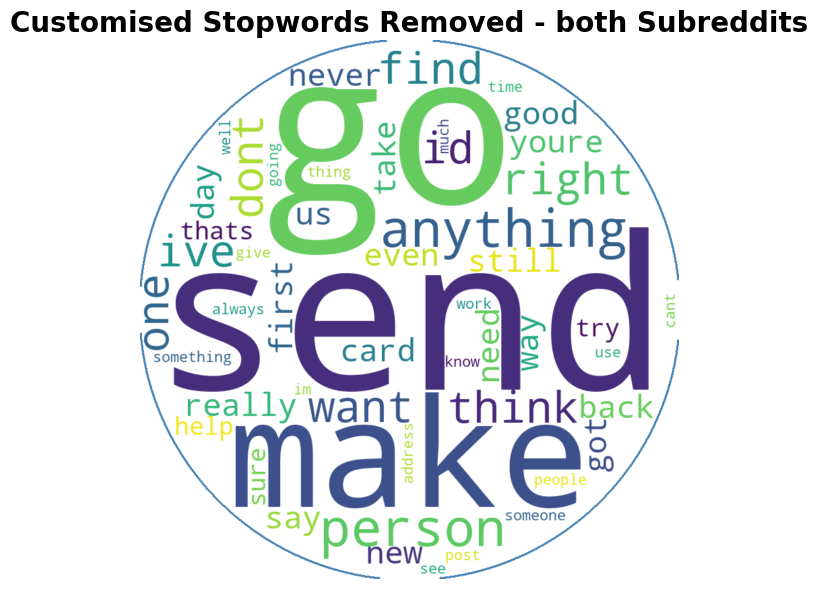

In [25]:
common_words_string = ' '.join(common_top_filtered_tokens)

# Create a circle mask
mask = np.zeros((800, 800), dtype=np.uint8)
mask = Image.new('RGB', (800, 800), (255, 255, 255))
draw = ImageDraw.Draw(mask)
draw.ellipse((0, 0, 800, 800), fill=(0, 0, 0))
mask = np.array(mask)
mask = mask[:, :, 1]

# Create and generate a word cloud image with the circle mask
wordcloud = WordCloud(background_color="white", max_words=100, mask=mask, contour_width=3, contour_color='steelblue').generate(common_words_string)

# Display the generated image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# Updated title settings for increased font size and weight
plt.title('Customised Stopwords Removed - both Subreddits', fontsize=20, fontweight='bold')
plt.show()

##### Converting datatype (list -> string)

In [26]:
# Convert data type from list back to string before running n-grams functions

removed_stopwords_cus_str_rk = rk['removed_customised_stopwords'].apply(lambda x: ' '.join(x))
# Create a copy of the DataFrame and assign tokens to a new column
rk = rk.copy()
rk['removed_customised_stopwords_str'] = removed_stopwords_cus_str_rk

removed_stopwords_cus_str_sc = sc['removed_customised_stopwords'].apply(lambda x: ' '.join(x))
# Create a copy of the DataFrame and assign tokens to a new column
sc = sc.copy()
sc['removed_customised_stopwords_str'] = removed_stopwords_cus_str_sc

#### 4.1.6 Analysing the N-grams (Round 3)

In [27]:
# RandomKindness n-gram after removing customised stop words
rk_top_unigram_3_df = top_unigram(rk, 'removed_customised_stopwords_str')
rk_top_bigram_3_df = top_bigram(rk, 'removed_customised_stopwords_str')
rk_top_trigram_3_df = top_trigram(rk, 'removed_customised_stopwords_str')
rk_n_gram_3_df = pd.concat([rk_top_unigram_3_df, rk_top_bigram_3_df, rk_top_trigram_3_df], axis=1)

In [28]:
# Print the rk_n-gram_3_df to check
rk_n_gram_3_df

,unigram,freq,bigram,freq,trigram,freq
0,love,2663,happy birthday,311,amazon wish list,33
1,thank,2484,sorry loss,133,happy birthday hope,25
2,ill,1157,feel free,108,thank kind offer,20
3,please,1078,last year,104,message moderator mail,20
4,happy,939,year old,95,please feel free,20
5,thanks,831,years ago,95,feel free pm,19
6,hope,818,thank kind,89,please read rules,19
7,offer,778,please pm,86,happy birthday spiderthom,18
8,birthday,754,please let,82,thank thank thank,17
9,pm,749,wish list,80,please message moderator,16


In [29]:
# Scams n-gram after removing customised stop words
sc_top_unigram_3_df = top_unigram(sc, 'removed_customised_stopwords_str')
sc_top_bigram_3_df = top_bigram(sc, 'removed_customised_stopwords_str')
sc_top_trigram_3_df = top_trigram(sc, 'removed_customised_stopwords_str')
sc_n_gram_3_df = pd.concat([sc_top_unigram_3_df, sc_top_bigram_3_df, sc_top_trigram_3_df], axis=1)

In [30]:
# Print the sc_n_gram_3_df to check
sc_n_gram_3_df

,unigram,freq,bigram,freq,trigram,freq
0,scam,3803,phone number,267,pig butchering scam,31
1,money,2520,gift cards,153,watch recovery scammers,25
2,account,1317,block ignore,142,buy gift cards,17
3,number,1169,social media,122,name phone number,17
4,email,1080,gon na,121,file police report,17
5,scammers,1076,bank account,113,reverse image search,15
6,phone,996,red flag,107,scam block ignore,14
7,call,935,years ago,97,social security number,14
8,pay,859,task scam,96,pig butchering scams,14
9,bank,846,friends family,94,long story short,13


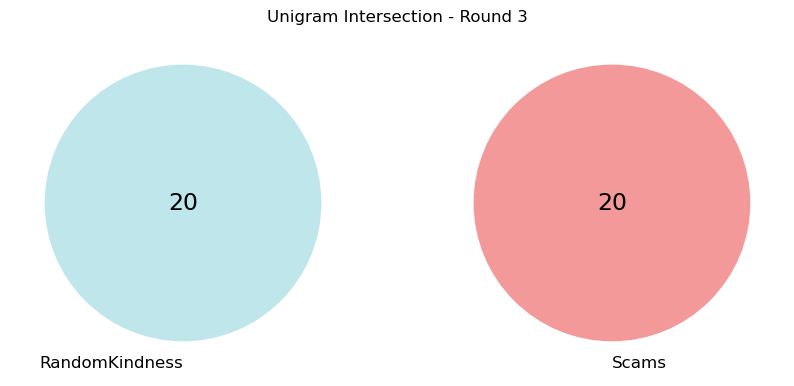

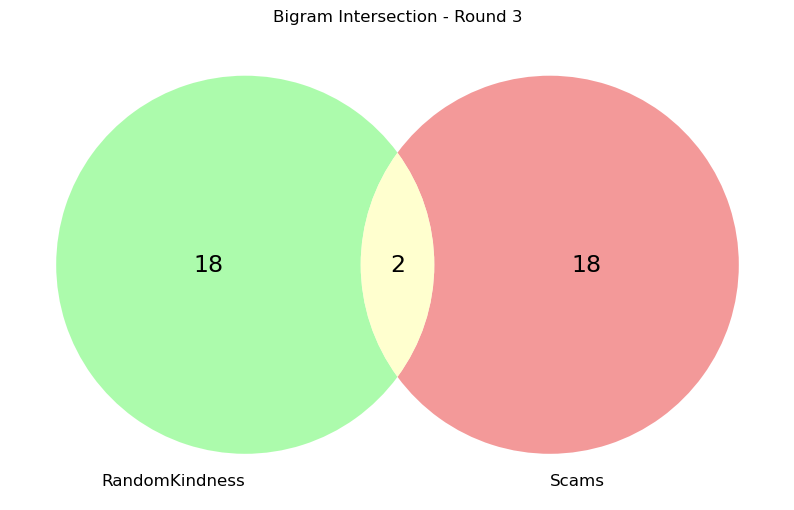

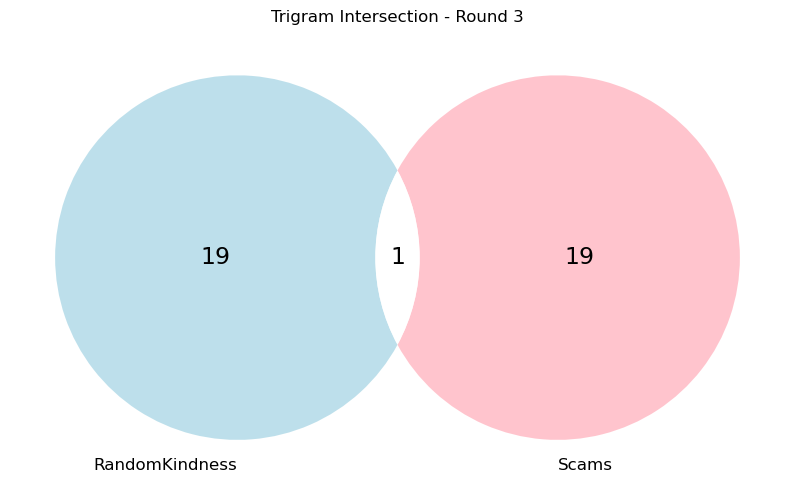

Common Words in Unigrams between RandomKindness and Scams:
Common Words in Bigrams between RandomKindness and Scams:
gon na
years ago
Common Words in Trigrams between RandomKindness and Scams:
long story short


In [31]:
# Venn Diagram visualisation to show intersected words (round 3)
rk_unigrams3 = set(rk_top_unigram_3_df['unigram'])
sc_unigrams3 = set(sc_top_unigram_3_df['unigram'])

rk_bigrams3 = set(rk_top_bigram_3_df['bigram'])
sc_bigrams3 = set(sc_top_bigram_3_df['bigram'])

rk_trigrams3 = set(rk_top_trigram_3_df['trigram'])
sc_trigrams3 = set(sc_top_trigram_3_df['trigram'])

# Plot the Venn diagram with custom colors (Unigram)
plt.figure(figsize=(10, 7))
venn = venn2([rk_unigrams3, sc_unigrams3], ('RandomKindness', 'Scams'), 
             set_colors=('powderblue', 'lightcoral'), alpha = 0.8)

# Change the font size for the subset numbers
for text in venn.subset_labels:
    if text:  # check if the subset label is not None
        text.set_fontsize(17)

plt.title('Unigram Intersection - Round 3')
plt.show()

# Plot the Venn diagram with custom colors (Bigram)
plt.figure(figsize=(10, 7))
venn = venn2([rk_bigrams3, sc_bigrams3], ('RandomKindness', 'Scams'), 
             set_colors=('palegreen', 'lightcoral'), alpha = 0.8)

# Change the font size for the subset numbers
for text in venn.subset_labels:
    if text:  # check if the subset label is not None
        text.set_fontsize(17)

plt.title('Bigram Intersection - Round 3')
plt.show()

# Plot the Venn diagram with custom colors (Trigram)
plt.figure(figsize=(10, 7))
venn = venn2([rk_trigrams3, sc_trigrams3], ('RandomKindness', 'Scams'), 
             set_colors=('lightblue', 'lightpink'), alpha = 0.8)

# Change the font size for the subset numbers
for text in venn.subset_labels:
    if text:  # check if the subset label is not None
        text.set_fontsize(17)

plt.title('Trigram Intersection - Round 3')
plt.show()

# Find the intersection (common bigrams) between the two sets
common_unigrams3 = rk_unigrams3.intersection(sc_unigrams3)
print("Common Words in Unigrams between RandomKindness and Scams:")
for unigram in common_unigrams3:
    print(unigram)

# Find the intersection (common bigrams) between the two sets
common_bigrams3 = rk_bigrams3.intersection(sc_bigrams3)
print("Common Words in Bigrams between RandomKindness and Scams:")
for bigram in common_bigrams3:
    print(bigram)

# Find the intersection (common trigrams) between the two sets
common_trigrams3 = rk_trigrams3.intersection(sc_trigrams3)
print("Common Words in Trigrams between RandomKindness and Scams:")
for trigram in common_trigrams3:
    print(trigram)


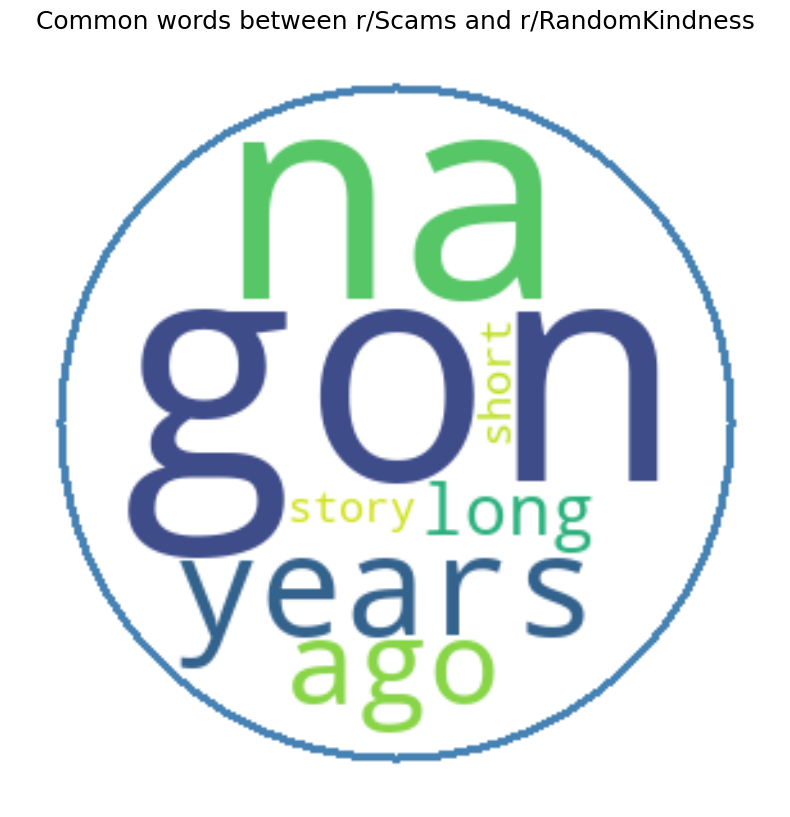

In [32]:
# For the purpose of this example, the intersection of bigrams and trigrams are treated as outliers for visualization.

# Find the intersection (common bigrams and trigrams) between the two sets
common_unigrams = rk_unigrams3.intersection(sc_unigrams3)
common_bigrams = rk_bigrams3.intersection(sc_bigrams3)
common_trigrams = rk_trigrams3.intersection(sc_trigrams3)

# Combine the outlier words into one list for word cloud generation
# For bigrams and trigrams, join the words with '_' to keep them as single entities in the word cloud
outlier_words = list(common_unigrams) + list(common_bigrams) + list(common_trigrams)

# Function to generate a circular masked word cloud
def generate_circular_word_cloud(word_list):
    text = ' '.join(word_list)
    x, y = np.ogrid[:300, :300]
    mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
    mask = 255 * mask.astype(int)
    wc = WordCloud(background_color='white', mask=mask, contour_width=3, contour_color='steelblue').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title('Common words between r/Scams and r/RandomKindness', size=18)
    plt.show()

# Generate word cloud for the outlier words
generate_circular_word_cloud(outlier_words)

**Analysis:**  
  
- After removing customised stop words, phrases like 'don't want' and 'I'm sure' are also removed. 
- As such, we are able to see more distinctive words/ phrases for each subreddit: eg. 'love', 'happy birthday' and 'mental health' for RandomKindness; and 'money', 'block ignore' and 'pig butchering scam' for Scams. 
- As such, we will include these customised stop words for the pre-processing of text for modeling.  
- As seen from visualisation above, the intersections are getting smaller - which is the objective of the N-gram analysis.

<table>
<tr>
<th>r/RandomKindness 3-Gram</th>
<th>r/Scams 3-Gram</th>
</tr>
<tr>
<td><img src='../images/3gram rRandomKindness.png' alt='r/RandomKindness outlier Screenshot' style='width:100%'/></td>
<td><img src='../images/3gram rScams.png' alt='r/Scams outlier Screenshot' style='width:100%'/></td>
</tr>
<tr>

<tr>
<th>r/RandomKindness 2-Gram</th>
<th>r/Scams 2-Gram</th>
</tr>
<tr>
<td><img src='../images/2gram rRandomKindness.png' alt='r/RandomKindness outlier Screenshot' style='width:100%'/></td>
<td><img src='../images/2gram rScams.png' alt='r/Scams outlier Screenshot' style='width:100%'/></td>
</tr>
</table>

### 4.2 Stemming and Lemmatization

- Stemming is the process of removing the suffixes from words to obtain their stems. 
    - For example, the words 'running', 'runner', and 'runners' all have the same stem 'run'.  
- Lemmatization is the process of transforming words to their canonical or dictionary forms, also known as lemmas. 
    - For example, the words 'am', 'is', and 'are' all have the same lemma 'be'.  
- There are various pros and cons to either technique. 
- We will do a side-by-side comparison to decide on our approach.

##### Defining function for Stemming

In [33]:
# Define a function to stem words
def stem_tokens(tokens):
    porter = PorterStemmer()
    stemmed_tokens = [porter.stem(token) for token in tokens]
    return stemmed_tokens

##### Defining function for Lemmatization

In [34]:
# Define a function to lemmatize words
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

##### Stem and Lemmatize filtered tokens from 'Random Kindness'

In [35]:
removed_stopwords_cus_stems_rk = rk['removed_customised_stopwords'].apply(stem_tokens)
# Create a copy of the DataFrame and assign tokens to a new column
rk = rk.copy()
rk['removed_customised_stopwords_stems'] = removed_stopwords_cus_stems_rk

removed_stopwords_cus_lem_rk = rk['removed_customised_stopwords'].apply(lemmatize_tokens)
# Create a copy of the DataFrame and assign tokens to a new column
rk = rk.copy()
rk['removed_customised_stopwords_lemmas'] = removed_stopwords_cus_lem_rk

# Stem and lemmatize filtered tokens from 'Scams'

removed_stopwords_cus_stems_sc = sc['removed_customised_stopwords'].apply(stem_tokens)
# Create a copy of the DataFrame and assign tokens to a new column
sc = sc.copy()
sc['removed_customised_stopwords_stems'] = removed_stopwords_cus_stems_sc

removed_stopwords_cus_lem_sc = sc['removed_customised_stopwords'].apply(lemmatize_tokens)
# Create a copy of the DataFrame and assign tokens to a new column
sc = sc.copy()
sc['removed_customised_stopwords_lemmas'] = removed_stopwords_cus_lem_sc

#### 4.2.1 r/RandomKindness Top Stems and Lemmas

In [36]:
# Compile all stems within each row into a single list
rk_all_stems = [stem for row in rk['removed_customised_stopwords_stems'] for stem in row]
# Retrieve top 100 most common stems
rk_top_stems = Counter(rk_all_stems).most_common(100)
# Create a new comparison dataframe for the top stems and its frequency
rk_sc_top_tokens = pd.DataFrame(rk_top_stems, columns=['RK Top Stems', 'Freq'])

In [37]:
# Compile all lemmas within each row into a single list
rk_all_lemmas = [lemmas for row in rk['removed_customised_stopwords_lemmas'] for lemmas in row]
# Retrieve top 100 most common lemmas
rk_top_lemmas = Counter(rk_all_lemmas).most_common(100)
# Create a new dataframe for the top lemmas and its frequency
rk_top_lemmas_df = pd.DataFrame(rk_top_lemmas, columns=['RK Top Lemmas', 'Freq'])
# Concatanate to comparison dataframe
rk_sc_top_tokens = pd.concat([rk_sc_top_tokens, rk_top_lemmas_df], axis=1)

#### 4.2.2 r/Scams Top Stems and Lemmas

In [38]:
# Compile all stems within each row into a single list
sc_all_stems = [stem for row in sc['removed_customised_stopwords_stems'] for stem in row]
# Retrieve top 100 most common stems
sc_top_stems = Counter(sc_all_stems).most_common(100)
# Create a new dataframe for the top stems and its frequency
sc_top_stems_df = pd.DataFrame(sc_top_stems, columns=['SC Top Stems', 'Freq'])
# Concatanate to comparison dataframe
rk_sc_top_tokens = pd.concat([rk_sc_top_tokens, sc_top_stems_df], axis=1)

In [39]:
# Compile all lemmas within each row into a single list
sc_all_lemmas = [lemmas for row in sc['removed_customised_stopwords_lemmas'] for lemmas in row]
# Retrieve top 100 most common lemmas
sc_top_lemmas = Counter(sc_all_lemmas).most_common(100)
# Create a new dataframe for the top lemmas and its frequency
sc_top_lemmas_df = pd.DataFrame(sc_top_lemmas, columns=['SC Top Lemmas', 'Freq'])
# Concatanate to comparison dataframe
rk_sc_top_tokens = pd.concat([rk_sc_top_tokens, sc_top_lemmas_df], axis=1)

#### A side-by-side comparison of stemming and lemmatization for RandomKindness and Scams

In [40]:
print(rk_sc_top_tokens)

   RK Top Stems  Freq RK Top Lemmas  Freq SC Top Stems  Freq SC Top Lemmas  Freq
0         thank  3394          love  2781         scam  5172          scam  4504
1          love  3183         thank  2484        money  2524         money  2524
2           ill  1179           ill  1157      scammer  1894       scammer  1894
3         pleas  1085        please  1078         call  1806       account  1614
4          hope  1034          year  1026      account  1630        number  1455
5         offer  1034         happy   939       number  1455         email  1277
6          year  1026         offer   844        email  1311          call  1179
7          kind   991        thanks   831          ask  1252         phone  1037
8         happi   982          hope   830        phone  1041          bank   960
9            pm   795            pm   795          pay  1036           pay   882
10     birthday   792      birthday   792         bank  1008          said   759
11         book   713       

**Analysis:**
    
- A quick lookthrough at the top 200 words in RandomKindness displayed many common words in both stemmed and lemmatized lists. 
- Due to the nature of how stemming is done, there are a number of incorrectly spelt words, for example 'realli', 'peopl', and 'someth'.  
  
- However, we noticed that there are variations of the same root word appearing in the lemmatized list as well, for example 'thank' and 'thanks', 'look' and 'looking', 'want' and 'wanted'. 
- These observations were consistent in both subreddits.  
  
- By stemming a term, more documents are matched, including alternate word forms. 
- This will increase the sensitivity rate, at the expense of reducing precision. 
- Since our end-goal is to optimize sensitivity/ recall rate, we will be doing stemming instead of lemmatization.

We will run a final n-gram analysis to look at the results before and after stemming.

#### 4.2.4 Final N-gram Analysis (Round 4)

##### Converting datatype (list -> string)

In [41]:
# Convert data type from list back to string before running n-grams functions

removed_stopwords_cus_str_stems_rk = rk['removed_customised_stopwords_stems'].apply(lambda x: ' '.join(x))
# Create a copy of the DataFrame and assign tokens to a new column
rk = rk.copy()
rk['removed_customised_stopwords_stems_str'] = removed_stopwords_cus_str_stems_rk

removed_stopwords_cus_str_stems_sc = sc['removed_customised_stopwords_stems'].apply(lambda x: ' '.join(x))
# Create a copy of the DataFrame and assign tokens to a new column
sc = sc.copy()
sc['removed_customised_stopwords_stems_str'] = removed_stopwords_cus_str_sc

In [42]:
# RandomKindness n-gram after removing customised stop words and stemming
rk_top_unigram_4_df = top_unigram(rk, 'removed_customised_stopwords_stems_str')
rk_top_bigram_4_df = top_bigram(rk, 'removed_customised_stopwords_stems_str')
rk_top_trigram_4_df = top_trigram(rk, 'removed_customised_stopwords_stems_str')
rk_n_gram_4_df = pd.concat([rk_top_unigram_4_df, rk_top_bigram_4_df, rk_top_trigram_4_df], axis=1)

In [43]:
# Scams n-gram after removing customised stop words
sc_top_unigram_4_df = top_unigram(sc, 'removed_customised_stopwords_stems_str')
sc_top_bigram_4_df = top_bigram(sc, 'removed_customised_stopwords_stems_str')
sc_top_trigram_4_df = top_trigram(sc, 'removed_customised_stopwords_stems_str')
sc_n_gram_4_df = pd.concat([sc_top_unigram_4_df, sc_top_bigram_4_df, sc_top_trigram_4_df], axis=1)

In [44]:
# Concatenate all dataframes into a single one
rk_n_gram_5_df = pd.concat([rk_top_unigram_3_df, rk_top_unigram_4_df, rk_top_bigram_3_df, rk_top_bigram_4_df, rk_top_trigram_3_df, rk_top_trigram_4_df], axis=1)
sc_n_gram_5_df = pd.concat([sc_top_unigram_3_df, sc_top_unigram_4_df, sc_top_bigram_3_df, sc_top_bigram_4_df, sc_top_trigram_3_df, sc_top_trigram_4_df], axis=1)

#### Side-by-side Comparison of N-grams before and after Stemming

In [45]:
print(rk_n_gram_5_df)
print(sc_n_gram_5_df)

     unigram  freq   unigram  freq           bigram  freq           bigram  freq                    trigram  freq                    trigram  freq
0       love  2663     thank  3394   happy birthday   311   happi birthday   316           amazon wish list    33           amazon wish list    36
1      thank  2484      love  3183       sorry loss   133       thank kind   164        happy birthday hope    25           thank kind offer    26
2        ill  1157       ill  1179        feel free   108         year old   141           thank kind offer    20        happi birthday hope    25
3     please  1078     pleas  1085        last year   104      thank offer   141     message moderator mail    20          messag moder mail    21
4      happy   939     offer  1034         year old    95       sorri loss   134           please feel free    20            pleas feel free    20
5     thanks   831      hope  1034        years ago    95        last year   119               feel free pm    19     

**Analysis:**  
  
- A quick side-by-side comparison of n-grams before and after stemming showed improved results.  
  
- For RandomKindness, before stemming, 'thank' and 'thanks' were split into two separate words. 
- After stemming, these two words are combined into 'thank'. 
- Comparing the frequency, this likely happened for other words like 'love' and 'hope'.  

- For Scams, the same observation was very obvious for words like 'scam', 'scammers', 'call' and 'account'.  
  
- This further validates our choice to adopt the stemming approach as one of the pre-processing techniques as it allows for a better capture of similar words into the same word count.

- To summarise, we generally see positive, encouraging and polite text in RandomKindness subreddit, for example 'kind', 'happy birthday' and 'please feel free'. 
- On the other hand, texts that appear in Scams subreddit bring across a more negative sentiment, as seen in words like 'fake', 'block ignore' and 'pig butchering scam'. 
- The underlying emotion behind the words used could likely help with identifying the intention of the post. 
- This would be very handy for the subreddit moderators as they decide whether to approve or decline posts that may seem suspicious.

### Exporting Pre-processed Dataset

In [46]:
rk_final = rk[['label', 'removed_customised_stopwords_stems_str']]
sc_final = sc[['label', 'removed_customised_stopwords_stems_str']]
rk_sc_final = pd.concat([rk_final, sc_final], axis=0)

In [48]:
rk_sc_final.to_csv('../data/rk_sc_final.csv', index=False)